In [18]:
import math
import matplotlib.pyplot as plt

In [19]:
def f(x_arr):
    return not ((x_arr[0] and x_arr[1]) or x_arr[2] or x_arr[3])

In [20]:
def allvariations(arr, count):
    result = []
    if count == 1:
        result = [[x] for x in arr]
    else:
        for x in range(len(arr)):
            tmp_arr = arr[x + 1:]
            for i in allvariations(tmp_arr, count - 1):
                result.append([arr[x]] + i)
    return result

In [21]:
def generate_input_array(bit_amount):
    i = 2 ** bit_amount
    arr = []
    for x in range(i):
        arr.append([int(x) for x in bin(x)[2:].zfill(bit_amount)])
    return arr

In [22]:
def func(net):
    return net >= 0

In [23]:
def RBF(x_arr, J_arr, u_arr, n):
    fi_arr = []

    y_arr = []
    b_arr = []
    for x_vect in x_arr:
        b_sum = 0
        fi_arr = []
        for j in range(len(J_arr)):
            fi = math.e ** (-sum([(x - c) ** 2 for x, c in zip(x_vect, J_arr[j])]))
            fi_arr.append(fi)
        net = sum(u * fi for u, fi in zip(u_arr[1:], fi_arr)) + u_arr[0]
        y_net = func(net)
        y_arr.append(y_net)
        y_real = f(x_vect)
        b = y_real - y_net
        b_sum += abs(b)
        delta_u_arr = []
        fi_arr = [1] + fi_arr
        for j in range(len(u_arr)):
            delta_u = n * b * fi_arr[j]
            delta_u_arr.append(delta_u)
            u_arr[j] += delta_u
        b_arr.append(b_sum)
    return u_arr, sum(b_arr), y_arr

In [24]:
n = 0.3
J_1 = 0
J_0 = 0
J_0_arr = []
J_1_arr = []
# подсчет количества значений
x_arr = []
for x in range(2 ** 4):
    x1 = x // (2 ** 3)
    x = x - x1 * (2 ** 3)
    x2 = x // (2 ** 2)
    x = x - x2 * (2 ** 2)
    x3 = x // 2
    x4 = x - x3 * 2
    x_arr.append([x1, x2, x3, x4])
    # print("Result:",[x1,x2,x3,x4],f([x1,x2,x3,x4]))
    if f([x1, x2, x3, x4]) == 1:
        J_1 += 1
        J_1_arr.append([x1, x2, x3, x4])
    else:
        J_0 += 1
        J_0_arr.append([x1, x2, x3, x4])
    if min(J_0, J_1) == J_0:
        J_arr = J_0_arr
        current_res = 0
    else:
        J_arr = J_1_arr
        current_res = 1
print('J_arr:',J_arr)

J_arr: [[0, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0]]


In [25]:
u_arr = [0] + [0 for x in range(len(J_arr))]

In [26]:
b_sum = []

####################################################################
Epoxa num: 1
W before: [0, 0, 0, 0]
W after: [-0.3, 0.029, 0.175, 0.175]
Error: 5
Y: [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
####################################################################
Epoxa num: 2
W before: [-0.3, 0.029, 0.175, 0.175]
W after: [-0.3, 0.219, 0.244, 0.244]
Error: 2
Y: [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
####################################################################
Epoxa num: 3
W before: [-0.3, 0.219, 0.244, 0.244]
W after: [-0.3, 0.219, 0.244, 0.244]
Error: 0
Y: [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


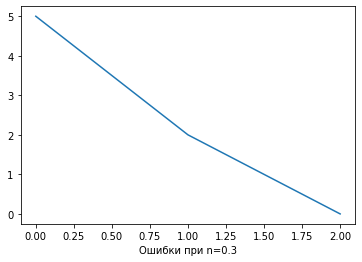

In [27]:
b = -1
epoch_num = 0
while b != 0:
    epoch_num += 1
    print("####################################################################")
    print("Epoxa num:", epoch_num)
    print("W before:", [round(u, 3) for u in u_arr])
    u_arr, b, y_arr = RBF(x_arr, J_arr, u_arr, n)
    print("W after:", [round(u, 3) for u in u_arr])
    print("Error:", b)
    print("Y:", [int(y) for y in y_arr])
    b_sum.append(b)
    # print(u_arr,b)
plt.plot(b_sum)
plt.xlabel("Ошибки при n=0.3")
plt.show()

In [29]:
tests = generate_input_array(4)
all_tests = []
for x in range(1, 17):
    all_tests += allvariations(tests, x)
print(len(all_tests))

65535


In [30]:
m = []
len_min = 10000
n = 0.3

In [31]:
for test in all_tests:
#     print(all_tests.index(test))
    b = 10000000000000
    epoch_num = 0
    u_arr = [1] + [0 for x in range(len(J_arr))]
    while b != 0 and epoch_num < 100:
        epoch_num += 1
        u_arr, b, y_arr = RBF(test, J_arr, u_arr, n)
    if b == 0:
        u_arr, b, y_arr = RBF(x_arr, J_arr, u_arr, n)
        if b == 0 and len(test) < len_min:
            m = test
            len_min = len(m)
            epoch = epoch_num
print(f"Minimum:{m}  Epoch:{epoch}")

Minimum:[[0, 0, 0, 0], [0, 0, 0, 1]]  Epoch:9


Error: 1
Epoch num: 1
W:  [0.7, -0.11, -0.04, -0.04]
Y: [True, True]
Error: 1
Epoch num: 2
W:  [0.4, -0.22, -0.08, -0.08]
Y: [True, True]
Error: 1
Epoch num: 3
W:  [0.1, -0.33, -0.12, -0.12]
Y: [True, True]
Error: 2
Epoch num: 4
W:  [0.1, -0.14, -0.05, -0.05]
Y: [False, True]
Error: 2
Epoch num: 5
W:  [0.1, 0.05, 0.02, 0.02]
Y: [False, True]
Error: 1
Epoch num: 6
W:  [-0.2, -0.06, -0.02, -0.02]
Y: [True, True]
Error: 2
Epoch num: 7
W:  [-0.2, 0.13, 0.05, 0.05]
Y: [False, True]
Error: 2
Epoch num: 8
W:  [-0.2, 0.32, 0.12, 0.12]
Y: [False, True]
Error: 0
Epoch num: 9
W:  [-0.2, 0.32, 0.12, 0.12]
Y: [True, False]


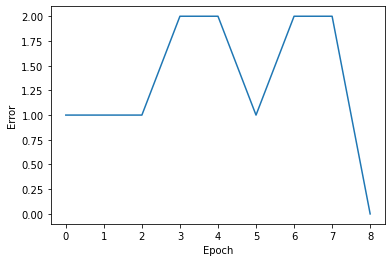

In [32]:
b = -1
epoch_num = 0
u_arr = [1] + [0 for x in range(len(J_arr))]
b_sum = []
while b != 0 and epoch_num < 1000:
    epoch_num += 1
    u_arr, b, y_arr = RBF(m, J_arr, u_arr, n)
    print('Error:', b)
    print('Epoch num:', epoch_num)
    print('W: ', [round(x, 2) for x in u_arr])
    print('Y:', y_arr)
    b_sum.append(b)
    # Minimum: [[0, 0, 0, 0], [0, 1, 0, 1], [0, 1, 1, 1], [1, 1, 0, 1]]
plt.plot(b_sum)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()